In [1]:
import os

import tensorflow as tf
from tensorflow import keras
import torch
import sys
import numpy as np

In [2]:
!ls 220308_23_52_b6_unet32_s2_tc_fp16/main/checkpoints_optimized_jaccard

_metrics.json  best.pth


In [3]:
!cat 220308_23_52_b6_unet32_s2_tc_fp16/main/checkpoints_optimized_jaccard/_metrics.json

{
  "best": {
    "optimized_jaccard/threshold": 0.3499999940395355,
    "optimized_jaccard": 0.7194233303445352,
    "accuracy": 0.96367274017334,
    "pred_mask/bce": 0.1041667981896549,
    "pred_mask/dice": 0.28283835844993616,
    "loss": 0.38700515854060674
  },
  "last": {
    "optimized_jaccard/threshold": 0.30000001192092896,
    "optimized_jaccard": 0.47853889772844743,
    "accuracy": 0.9130987091064456,
    "pred_mask/bce": NaN,
    "pred_mask/dice": NaN,
    "loss": NaN
  },
  "train.6": {
    "optimized_jaccard/threshold": 0.3499999940395355,
    "optimized_jaccard": 0.7194233303445352,
    "accuracy": 0.96367274017334,
    "pred_mask/bce": 0.1041667981896549,
    "pred_mask/dice": 0.28283835844993616,
    "loss": 0.38700515854060674
  },
  "train.4": {
    "optimized_jaccard/threshold": 0.32499998807907104,
    "optimized_jaccard": 0.7073660116160234,
    "accuracy": 0.9615985885620115,
    "pred_mask/bce": 0.11052386885955934,
    "pred_mask/dice": 0.3171544549465179,
 

In [3]:
checkpoint_file = '220308_23_52_b6_unet32_s2_tc_fp16/main/checkpoints/best.pth'
model_dict = torch.load('220308_23_52_b6_unet32_s2_tc_fp16/main/checkpoints/best.pth', 
           map_location=torch.device('cpu')
          )

In [4]:
sys.path.append('/misc/home1/s0011/segmentim/catalyst-inria')

In [5]:
from catalyst_inria.inria.models import model_from_checkpoint

In [6]:
model, checkpoint = model_from_checkpoint(checkpoint_file, strict=False)

In [9]:
model

UnetSegmentationModel(
  (encoder): B6Encoder(
    (encoder): EfficientNetFeatures(
      (conv_stem): Conv2dSame(3, 56, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn1): BatchNorm2d(56, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (act1): Swish()
      (blocks): Sequential(
        (0): Sequential(
          (0): DepthwiseSeparableConv(
            (conv_dw): Conv2d(56, 56, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=56, bias=False)
            (bn1): BatchNorm2d(56, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (act1): Swish()
            (se): SqueezeExcite(
              (conv_reduce): Conv2d(56, 14, kernel_size=(1, 1), stride=(1, 1))
              (act1): Swish()
              (conv_expand): Conv2d(14, 56, kernel_size=(1, 1), stride=(1, 1))
              (gate): Sigmoid()
            )
            (conv_pw): Conv2d(56, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn2): BatchNorm2d(32,

In [7]:
torch.cuda.is_available()

True

In [3]:
import segmentation_models_pytorch as smp

model = smp.Unet(
    encoder_name="resnet34",        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
    in_channels=3,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=1,                      # model output channels (number of classes in your dataset)
)

In [8]:
import os
import torch
import matplotlib.pyplot as plt
import random

from pprint import pprint
from torch.utils.data import DataLoader
from PIL import Image
from torchvision.transforms import ToTensor
import torch 

In [21]:
import segmentation_models_pytorch as smp

ModuleNotFoundError: No module named 'segmentation_models_pytorch'

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


for cmap in [
    plt.get_cmap(), plt.get_cmap('turbo'), *[plt.get_cmap(n) for n in ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']]
]:
    ncolors = 256
    color_array = cmap(range(ncolors))
    color_array[:,-1] = np.linspace(0.0,1.0,ncolors)
    map_object = LinearSegmentedColormap.from_list(name=f'transparent_{cmap.name}',colors=color_array)
    plt.register_cmap(cmap=map_object)

#     f,ax = plt.subplots()
#     print(f'transparent_{cmap.name}')
#     h = ax.imshow(np.random.rand(10,10),cmap=f'transparent_{cmap.name}')
#     plt.colorbar(mappable=h)
#     plt.show()

In [9]:
names = !ls ~/data_inria/train/gt/

In [111]:
path = random.choice(names)
print(path)

gt_path = f'/home/s0011/data_inria/train/gt/{path}'
im_path = f'/home/s0011/data_inria/train/images/{path}'

chicago6.tif


In [113]:
k = 2
max_size=(k*256,k*256)

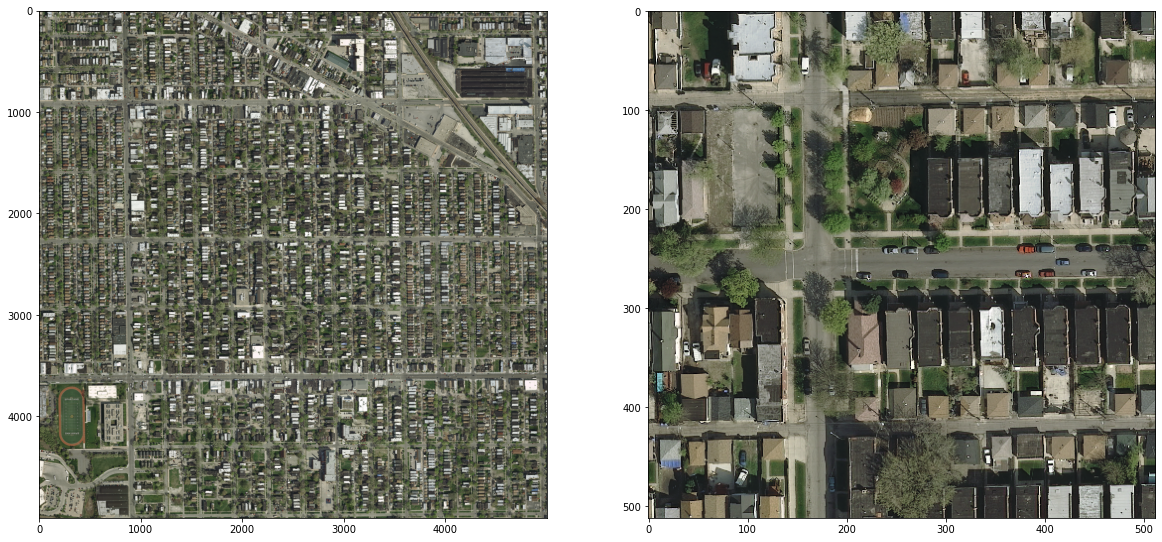

In [114]:
f,ax = plt.subplots(1,2, figsize=(20,10))
image = Image.open(im_path)
ax[0].imshow(image)
ax[1].imshow(image.crop((0, 0, *max_size)))

In [50]:
def open_to_tensor(path, max_size=None):
    image = Image.open(path)
    w, h = image.size
    print(w, h)
    k = 32
    w -= w % k
    h -= h % k
    if max_size:
        w, h = max_size
    size = (0, 0, w, h)
    image = image.crop(size)
    image = ToTensor()(image)
    image = torch.unsqueeze(image, 0)
    print(image.shape)
    return image

open_to_tensor(im_path, max_size=(256, 256)).shape

5000 5000
torch.Size([1, 3, 256, 256])


torch.Size([1, 3, 256, 256])

In [115]:
image = open_to_tensor(im_path, max_size=max_size)
# image = torch.rand([1, 3, 32*k, 32*k])

5000 5000
torch.Size([1, 3, 512, 512])


In [116]:
gt_mask = open_to_tensor(gt_path, max_size=max_size)

5000 5000
torch.Size([1, 1, 512, 512])


In [117]:
with torch.no_grad():
#     opp,_,_ = m(vec)
    logits = model(image)
#     mask = logits.sigmoid()

In [118]:
mask = logits['pred_mask'].sigmoid()
raw_mask = logits['pred_mask'].sigmoid()
# mask = (mask>0.5).float()

In [18]:
def plot_im(im):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(
        im, 
        cmap='gray'
    )
    plt.show()

In [21]:
def plot_lineup(im, ms, gt, figsize=None, ax=None):
    if not figsize:
        figsize = (20,20)
    if not ax:
        fig, ax = plt.subplots(figsize = figsize)

    img = ax.imshow(im, interpolation='nearest', origin='lower')
    img = ax.imshow(gt, 
                    interpolation='nearest', 
                    origin='lower', 
                    alpha=0.5, 
                    cmap='transparent_viridis')
    img = ax.imshow(ms, 
                    interpolation='nearest', 
                    alpha=0.5, 
                    origin='lower',
                    cmap='transparent_BuPu',
                   )


In [22]:
SMOOTH = 1e-6
def get_iou(pred, gt):
    
    b, c, w, h = gt.size()
    intersection = pred.logical_and(gt)
    union = pred.logical_or(gt)
    iou = (intersection + SMOOTH) / (union + SMOOTH) 
    return iou.sum()/(w*h)

In [119]:
mask_p = mask.permute(3,2,1,0).detach().numpy().squeeze()
# plot_im(mask_p)

In [120]:
im = image.permute(3,2,1,0).squeeze()
# plot_im(im)

In [121]:
gt = gt_mask.permute(3,2,1,0).squeeze()
# plot_im(gt)

In [122]:
print(f'{float(get_iou(mask, gt_mask)):f}')

0.291085


0.291085


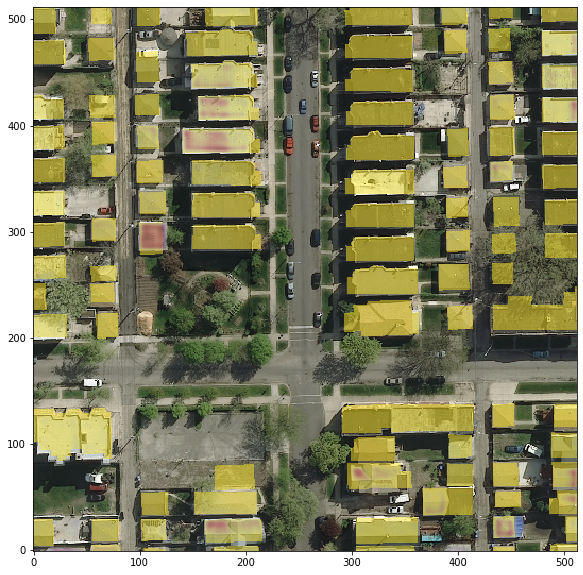

In [123]:
# t = 0.3
# mask = (raw_mask>t).float()
mask_p = mask.permute(3,2,1,0).detach().numpy().squeeze()
plot_lineup(im, mask_p, gt, figsize=(10, 10))
print(f'{float(get_iou(mask, gt_mask)):f}')

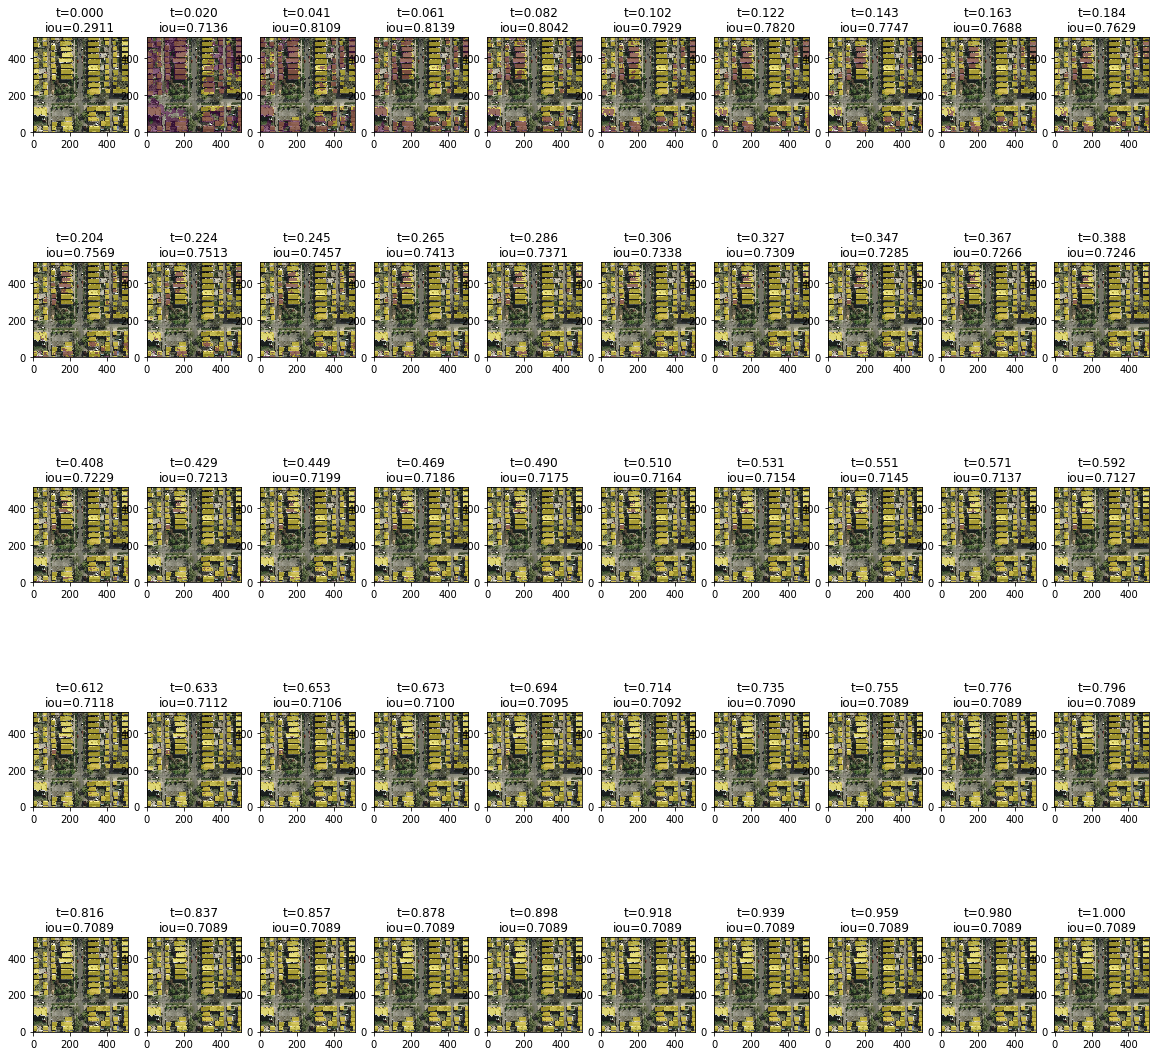

In [124]:
size = (5, 10)
fig, axs = plt.subplots(*size, figsize=(20, 20))

l = iter(np.linspace(0, 1, num=np.multiply(*size)))
res = {}
for x in range(size[0]):
    for y in range(size[1]):
        t = next(l)
        mask_thr = (raw_mask>=t).float()
        mask_plt = mask_thr.permute(3,2,1,0).detach().numpy().squeeze()
        iou_value = float(get_iou(mask_thr, gt_mask))
        axs[x, y].set_title(f't={t:.3f}\niou={iou_value:.4f}')
        plot_lineup(im, mask_plt, gt, figsize=(10, 10), ax=axs[x, y])
        res[t] = iou_value
        
# fig.tight_layout()

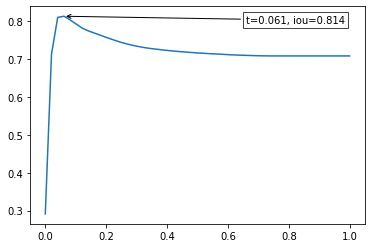

In [125]:
data = np.array(list(res.items())).T
x, y = data

fig, ax = plt.subplots()
ax.plot(x, y)

def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "t={:.3f}, iou={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x,y)


plt.show()

In [125]:
from sklearn.metrics import jaccard_score
jaccard_score(mask.int(), gt_mask.int())

ValueError: unknown is not supported

In [126]:
best_t, max_iou = data[:,np.argmax(data, axis=1)[1]]
mask = (raw_mask>best_t).float()
mask_p = mask.permute(3,2,1,0).detach().numpy().squeeze()

Text(0.5, 1.0, 'threshold=0.061, iou=0.814')

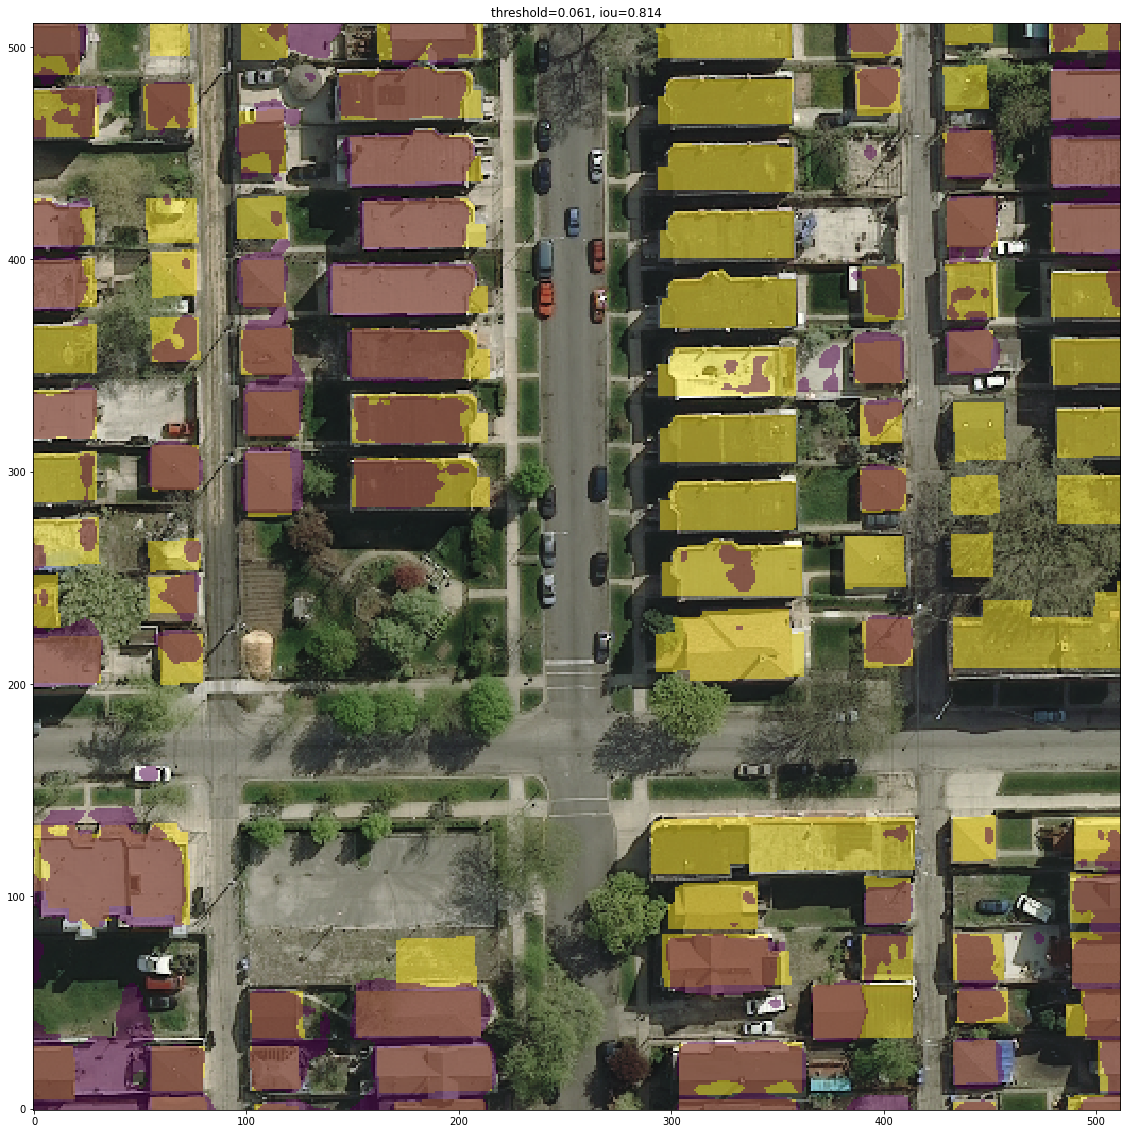

In [127]:
plot_lineup(im, mask_p, gt)
plt.title(f'threshold={best_t:.3f}, iou={max_iou:.3f}')

In [166]:
!git clone git@github.com:gerberka/catalyst-inria.git


Cloning into 'catalyst-inria'...
remote: Enumerating objects: 1341, done.
remote: Counting objects: 100% (1341/1341), done.
remote: Compressing objects: 100% (379/379), done.
remote: Total 1341 (delta 958), reused 1341 (delta 958), pack-reused 0
Receiving objects: 100% (1341/1341), 1.63 MiB | 2.85 MiB/s, done.
Resolving deltas: 100% (958/958), done.
Updating files: 100% (50/50), done.


In [1]:
def get_model(model_name: str, pretrained=True, **kwargs):
    from catalyst.dl import registry

    model_fn = registry.MODEL.get(model_name)
    return model_fn(pretrained=pretrained, **kwargs)

In [3]:
get_model("b6_unet32_s2")

ImportError: cannot import name 'registry' from 'catalyst.dl' (/home/s0011/miniconda3/lib/python3.8/site-packages/catalyst/dl/__init__.py)

In [6]:
import catalyst


In [9]:
dir(catalyst.dl)

AttributeError: module 'catalyst' has no attribute 'catalyst'

In [ ]:

n_cpu = os.cpu_count()
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=n_cpu)
valid_dataloader = DataLoader(valid_dataset, batch_size=16, shuffle=False, num_workers=n_cpu)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=n_cpu)